### NOTEBOOK DESCRIPTION:

This notebook does the axis projection based on age and gender axis as well as a validation technique based on the generated axis

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


scriptpath = "/home/jouven/youtube_projects/"
sys.path.append(os.path.abspath(scriptpath))

from helpers.helpers_channels_more_300 import *
from helpers.helpers_channel_embedding import *
from helpers.helpers_visualization_axis_projection import *

### Selected parameters for the axis projection

In [2]:
# Number of neirest neighbors taken
k = 10

# Selected number of pairs to create the axis
nb_selected_pairs = 6

### Useful functions

In [3]:
PATH = '/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/channel_sampling_then_combination/CONTEXT_True_100_SUBSAMPLING_FALSE_0.001_LR_0.005/models/embedding.csv.gz'

In [4]:
dict_channel_ind, dict_ind_channel, channels_id = filtered_channels_index_id_mapping()

## Finding cultural axis for our channel embedding

In [5]:
selected_channels = []
for channel in channels_id:
    selected_channels.append(dict_channel_ind[channel])

In [6]:
channelcrawler_projection = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
# Select the rows being in the select channels
channelcrawler_projection = channelcrawler_projection[channelcrawler_projection['channel'].apply(lambda row: row in channels_id)]

In [7]:
channelcrawler_projection.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


### Gender axis: men vs women

In [8]:
# Here you will find everything about: Men's Fashion, Hairstyle, Fitness & Health, Personal Vlogs and Tech.
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Alex Costa']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
2519,Howto & Style,2011-09-29,UCZyCposXwcyopaACep44maQ,Alex Costa,2120000,543,5370.0,2.417


In [9]:
# vlog channel about make up, hair transformation, rings selections, ...
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Shaaanxo']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
1737,Howto & Style,2009-01-18,UCMpOz2KEfkSdd5JeIJh_fxw,Shaaanxo,3215340,1422,3566.0,2.278


In [10]:
gender_seed = (dict_channel_ind['UCMpOz2KEfkSdd5JeIJh_fxw'], dict_channel_ind['UCZyCposXwcyopaACep44maQ'])

gender_axis, df_gender_axis = compute_axis_vector_based_on_seed(PATH, k, gender_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)


In [11]:
df_gender_axis

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
32211,People & Blogs,2010-01-27,UCCVPSH-O0TJ-N2WcnFUnT3w,CandidMommy,163000,3135,106604.0,4.5670
1604,Education,2008-11-23,UC3w193M5tYPJqF0Hi-7U-2g,Dr. Eric Berg DC,3150000,2666,3266.0,2.2745
4803,Entertainment,2006-11-16,UCb0tMboxhHE8Jx6-nhJmRPw,Allure,1260000,1257,11215.0,2.6455
843,Entertainment,2015-09-25,UCHJuQZuzapBh-CuhRYxIZrg,Insider,4890000,6822,1613.0,2.0870
37676,People & Blogs,2011-10-29,UC_kTqkxIUpycqnCGTcbwxow,Kara Corey Fit Life,127000,1187,130233.0,4.0920
9343,Sports,2011-12-13,UCh0wrs-8ywjgZO7flfSmlqg,PhysiquesOfGreatness...,730000,873,24253.0,2.9260
306,Howto & Style,2012-10-07,UC0YvTCy1I4_a-3pn47_5DBA,SaraBeautyCorner - D...,10400000,113,499.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
32495,Gaming,2008-06-29,UC7yzMJSKJSp5O2zuzgt3Wsw,SonicSong182,149000,473,107832.0,4.4865
31650,Gaming,2008-07-11,UC1wWQb7GYP6d_FdrNts-DpQ,Charriii5,161000,619,104236.0,4.3050


### Age axis: kids vs adult

In [12]:
# Animation for kids
channelcrawler_projection[channelcrawler_projection['name_cc'] == "Magpiepony"]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
8280,Film and Animation,2013-12-17,UCISF5OGuAtSLNF24TKTnXag,Magpiepony,736000,304,21120.0,2.9225


In [13]:
# Channel analysing the films
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Beyond The Trailer']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
7841,Entertainment,2008-11-03,UCAXR2zenCwvRIyQd9ydtfaA,Beyond The Trailer,853000,5064,19744.0,2.8635


In [14]:
age_seed = (dict_channel_ind['UCISF5OGuAtSLNF24TKTnXag'], dict_channel_ind['UCAXR2zenCwvRIyQd9ydtfaA'])

age_axis, df_output_age = compute_axis_vector_based_on_seed(PATH, k, age_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)

In [15]:
df_output_age

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
3320,Film and Animation,2012-09-25,UCyjTUNqX_vasRG4AAaM34jA,Animation Domination...,1899859,254,7366.0,2.5365
66,Entertainment,2007-01-25,UCaWd5_7JhbQBe4dknZhsHJg,WatchMojo.com,21284359,17081,114.0,2.0870
3650,Comedy,2007-02-15,UCNyJk0eoESO3CxAmrktAB5w,Whitney Avalon,1680000,64,8276.0,2.5425
938,Entertainment,2010-05-30,UCQjh-JVPNWfY-KsZS3RgRHw,Clevver News,4550000,19142,1800.0,2.0870
16980,Gaming,2012-05-02,UCQTyMsas9G2_NAQkZFI-2UQ,Michaela Laws,365000,716,48494.0,3.4070
2668,Education,2014-12-18,UC_1HVMnw-610qx54iEiWk7A,akidearest,2140000,453,5780.0,2.4590
7623,Gaming,2011-08-06,UCsS3UQD3nvoRkz_W5CR5Y-w,MsBreezy,905000,653,19117.0,2.8770
716,Gaming,2010-09-01,UCdJdEguB1F1CiYe7OEi3SBg,JonTronShow,5662544,110,1315.0,2.0870
28617,Comedy,2016-03-16,UC8huou5jTYkbv8m0WFgeXag,Random Týpek,153000,70,92653.0,3.9355
2237,Entertainment,2014-07-02,UCa6TeYZ2DlueFRne5DyAnyg,Grandayy,2430000,550,4769.0,2.3670


## Validation of the created axis

In [16]:
EMBEDDING = get_dataframe_in_embedding_space(PATH)

In [18]:
# Select the rows being in the select channels (english channels)
channelcrawler = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
channelcrawler = channelcrawler[channelcrawler['channel'].apply(lambda row: row in channels_id)]

In [19]:
dict_idx_name, dict_name_idx = channel_to_name(channelcrawler, dict_channel_ind)

#### 1. Projection of the gender axis

In [20]:
df_gender_projection = create_projection(EMBEDDING, gender_axis, dict_idx_name)

In [21]:
# Inverse the signs for color matiching ...
df_gender_projection['projection'] = -df_gender_projection['projection']

In [22]:
df_gender_projection.head()

,name,projection
0,Winded Voyage Sailin...,-4.187558
1,The Night Fury,-0.174620
2,Red Bull Surfing,2.598743
3,Heidi Joubert,-0.252121
4,MR JC,0.418371


In [23]:
seed_gender_name = ('Alex Costa', 'Shaaanxo')

No handles with labels found to put in legend.


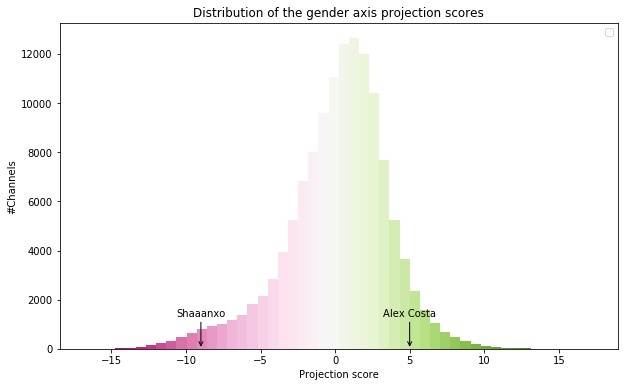

In [24]:
save_path = '/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_combination/CONTEXT_True_100_SUBSAMPLING_False_LR_0.005/gender_projection.pdf'
visualization(df_gender_projection, seed_gender_name, 'PiYG', 47, 'Distribution of the gender axis projection scores', save_path = save_path)


In [25]:
def create_plot(df_left, df_right, selected_pairs, title, size, cm, resize = 1, save_path = None):
    fig, ax = plt.subplots(figsize = size)
    ax.axis('off')
    X = np.arange(selected_pairs)
    for ind in X:
        ax.annotate(df_left['name'].iloc[ind], (0, 0), (df_left['projection'].iloc[ind] - 1, ind-0.05), horizontalalignment='right', size = 15)
        ax.annotate(df_right['name'].iloc[ind], (0, 0), (df_right['projection'].iloc[ind] + 1, ind-0.05), horizontalalignment='left', size = 15)

        ax.annotate(round(df_left['projection'].iloc[ind], 2), (0, 0), (-0.1, ind-0.05), horizontalalignment='right', color = 'w', size = 15)
        ax.annotate(round(df_right['projection'].iloc[ind], 2), (0, 0), (0.1, ind-0.05), horizontalalignment='left', color = 'w', size = 15)

    ax.barh(X, np.array(df_left['projection'])*resize, color = cm(10))
    ax.barh(X, np.array(df_right['projection'])*resize, color = cm(300))
    ax.set_title(title)
    if save_path != None:
        plt.savefig(save_path, dpi=500)
    plt.show()

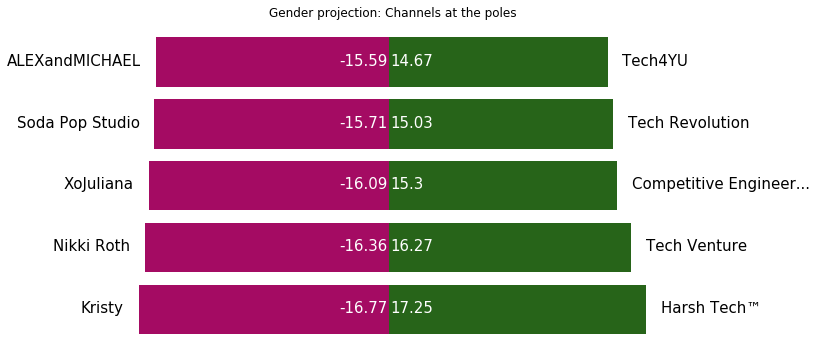

In [26]:
color = 'PiYG'
save_path = '/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_combination/CONTEXT_True_100_SUBSAMPLING_False_LR_0.005/gender_poles.pdf'
cm = plt.cm.get_cmap(color)
selected_pairs = 5

df_left  = df_gender_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_gender_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the poles", (10, 6), cm, save_path = save_path)


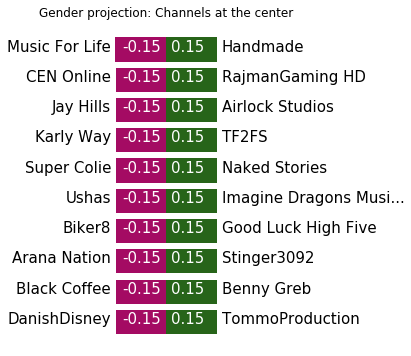

In [27]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_gender_projection['projection'].gt(-0.15)
df_left  = df_gender_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_gender_projection['projection'].gt(0.15)
df_right = df_gender_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the center", (2, 6), cm, 7)

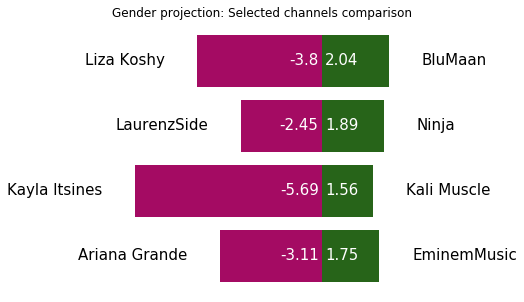

In [28]:
save_path = '/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_combination/CONTEXT_True_100_SUBSAMPLING_False_LR_0.005/gender_selected.pdf'

df_right = pd.DataFrame()
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'EminemMusic'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Kali Muscle'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Ninja'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'BluMaan'])

df_left = pd.DataFrame()
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Ariana Grande'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Kayla Itsines'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'LaurenzSide'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Liza Koshy'])

color = 'PiYG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, len(df_right), "Gender projection: Selected channels comparison", (5, 5), cm, save_path = save_path)


Select reknown girl or men like channels and validate if these channels are indeed correctly classified.
- first line: fashion channels
- second line: gaming channels
- third line: fitness channels
- fourth line: music channels

#### 2. Projection on the age axis

Channels having a negative projections score should correspond to adult channels, positive projections score should correspond to kids channels

In [29]:
df_age_projection = create_projection(EMBEDDING, age_axis, dict_idx_name)
df_age_projection.head()

,name,projection
0,Winded Voyage Sailin...,-1.627919
1,The Night Fury,2.280853
2,Red Bull Surfing,-2.396576
3,Heidi Joubert,-2.495943
4,MR JC,2.158935


No handles with labels found to put in legend.


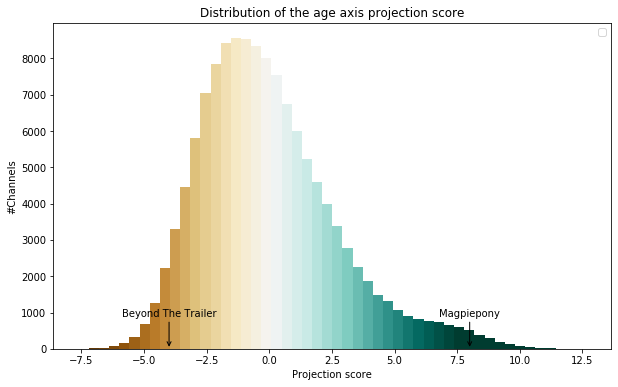

In [30]:
age_seed_name = ("Magpiepony", 'Beyond The Trailer')
save_path = '/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_combination/CONTEXT_True_100_SUBSAMPLING_False_LR_0.005/age_projection.pdf'
visualization(df_age_projection, age_seed_name, 'BrBG', 37, 'Distribution of the age axis projection score', save_path = save_path)

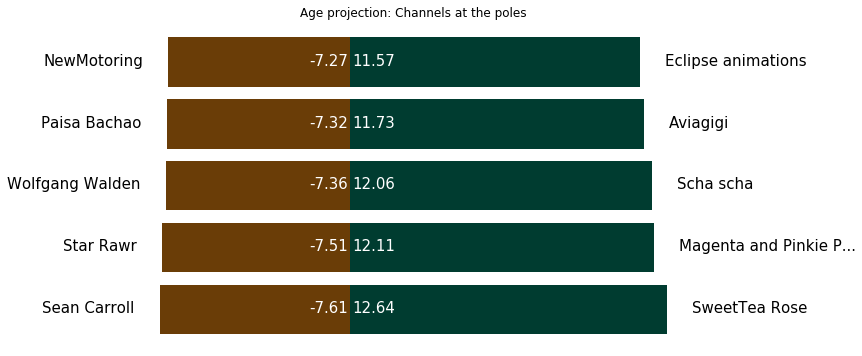

In [31]:
color = 'BrBG'
save_path = '/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_combination/CONTEXT_True_100_SUBSAMPLING_False_LR_0.005/age_pole.pdf'
cm = plt.cm.get_cmap(color)
selected_pairs = 5

df_left  = df_age_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_age_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Age projection: Channels at the poles", (10, 6), cm, save_path = save_path)

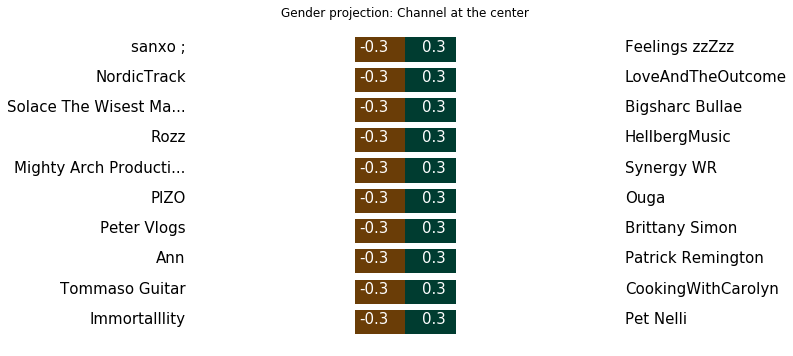

In [32]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_age_projection['projection'].gt(-0.3)
df_left  = df_age_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_age_projection['projection'].gt(0.3)
df_right = df_age_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channel at the center", (2, 6), cm, 1)

In [ ]:
save_path = '/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_combination/CONTEXT_True_100_SUBSAMPLING_False_LR_0.005/age_selected.pdf'

df_left = pd.DataFrame()
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'Classical Tunes'])
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'James Bond 007'])
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'Call of Duty'])

df_right = pd.DataFrame()
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'Kids TV - Nursery Rh...'])
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'My Little Pony Offic...'])
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'Kids Games Tv'])

color = 'BrBG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, 3, "Age projection: Selected channels comparison", (5, 3.5), cm, save_path = save_path)
